<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   order_id       1000 non-null   int64         
 1   customer_id    1000 non-null   int64         
 2   payment        1000 non-null   int64         
 3   order_date     1000 non-null   datetime64[ns]
 4   delivery_date  1000 non-null   object        
dtypes: datetime64[ns](1), int64(3), object(1)
memory usage: 39.2+ KB
   index product_name  jumlah_produk
0      0       Hoodie             83
1      5       Kemeja             94
2      2          Jas             97
3      9      Varsity             99
4      8          Tas            100
5      4         Kaos            101
6      7      Sweater            103
7      1        Jaket            106
8      6       Sepatu            106
9      3        Jeans            111


C:\Users\20201105\AppData\Local\Temp\ipykernel_23408\3576239987.py:52: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="jumlah_produk", y="product_name", data=produk_df.sort_values(by = "jumlah_produk", ascending = False).head(5), palette=colors, ax=ax[0])
C:\Users\20201105\AppData\Local\Temp\ipykernel_23408\3576239987.py:58: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="jumlah_produk", y="product_name", data=produk_df.sort_values(by="jumlah_produk", ascending=True).head(5), palette=colors, ax=ax[1])


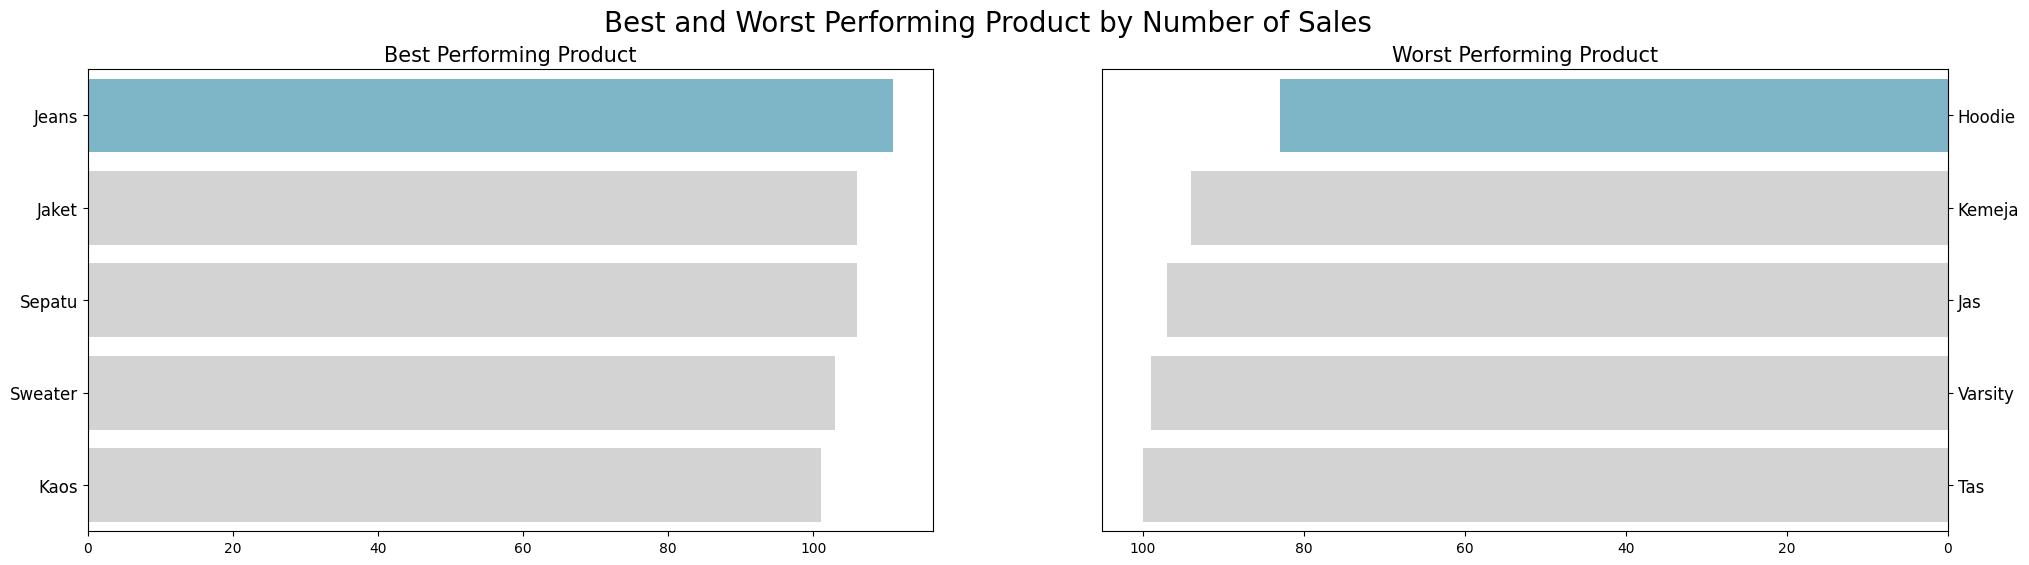

In [87]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

orders_df = pd.read_csv('orders.csv')
orders_df['order_date'] = pd.to_datetime(orders_df['order_date'])
orders_df.info()
orders_df.describe(include = "all")

#Kita mencoba melengkapi tabel dengan menambahkan kolom baru bernama total_price, dan akan diisi nilai random
total_price = np.random.randint(10000, 50001, size = len(orders_df)) #np.random.randint(min, max (dia exclusive, jadi harus + 1), size)
orders_df['total_price'] = total_price

#Tambah kolom order_count
order_count = np.random.randint(1, 201, size = len(orders_df)) 
orders_df['order_count'] = order_count
orders_df.describe()

#Menambahkan kolom baru
jenis_produk = ["Jaket", "Tas", "Sepatu", "Sweater", "Varsity", "Jas", "Hoodie", "Kaos", "Kemeja", "Jeans"]
nama_produk = np.random.choice(jenis_produk, size = len(orders_df))
orders_df['product_name'] = nama_produk
orders_df.describe(include = "all")

# Menghitung frekuensi setiap produk menggunakan value_counts()
product_counts = orders_df['product_name'].value_counts()

#Product name dan jumlahnya di data awal (cara 1)
#Map = menggantikan nilai pada kolom jumlah produk dengan product_counts
orders_df['jumlah_produk'] = orders_df['product_name'].map(product_counts)
orders_df.describe(include = "all")

# Mengelompokkan dan menghitung jumlah produk, kemudian mengurutkannya
produk_df = orders_df.groupby('product_name').agg({
    'jumlah_produk': 'max'  # Atau gunakan 'sum' jika menghitung total produk
}).reset_index()

# #Print semua row untuk setiap nama produk
# for index, row in produk_df.iterrows():
#     print(row,"\n")

#Sorting berdasarkan jumlah produk
produk_df = produk_df.sort_values(by = "jumlah_produk", ascending = True).reset_index()
print(produk_df)

#Pembuatan Barchart
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(24, 6))
 
colors = ["#72BCD4", "#D3D3D3", "#D3D3D3", "#D3D3D3", "#D3D3D3"]
 
sns.barplot(x="jumlah_produk", y="product_name", data=produk_df.sort_values(by = "jumlah_produk", ascending = False).head(5), palette=colors, ax=ax[0])
ax[0].set_ylabel(None)
ax[0].set_xlabel(None)
ax[0].set_title("Best Performing Product", loc="center", fontsize=15)
ax[0].tick_params(axis ='y', labelsize=12)
 
sns.barplot(x="jumlah_produk", y="product_name", data=produk_df.sort_values(by="jumlah_produk", ascending=True).head(5), palette=colors, ax=ax[1])
ax[1].set_ylabel(None)
ax[1].set_xlabel(None)
ax[1].invert_xaxis()
ax[1].yaxis.set_label_position("right")
ax[1].yaxis.tick_right()
ax[1].set_title("Worst Performing Product", loc="center", fontsize=15)
ax[1].tick_params(axis='y', labelsize=12)
 
plt.suptitle("Best and Worst Performing Product by Number of Sales", fontsize=20)
plt.show()


#Cara 2
# #Melihat data terkait produk dengan membuat data frame baru
# produk_df = pd.DataFrame({
#     'nama_produk' : produk_counts.index, #index = nama produk, values = hasil count
#     'jumlah' : produk_counts.values
# })

# produk_df.head(10)


# #Melakukan resampling data berdasarkan bulan
# monthly_orders_df = orders_df.resample(rule='M', on='order_date').agg({ #M = month
#     "order_id": "nunique",
#     "total_price": "sum" #Total price akan berdasarkan total dari seluruh orders di bulan tersebut
# })
# monthly_orders_df.index = monthly_orders_df.index.strftime('%Y-%m')
# monthly_orders_df = monthly_orders_df.reset_index() #Apabila tanpa di reset, maka index informasi tabel orders akan berdasarkan order_date nya, 
#                                                     #dengan direset, kita menggunakan index default (0,1,2,3 dst)
# #Melakukan rename pada kolom
# #DataFrame.rename(columns={'old_name': 'new_name'}, inplace=True)
# monthly_orders_df.rename(columns={
#     "order_id": "jumlah_order",
#     "total_price": "keuntungan"
# }, inplace=True)
# # monthly_orders_df.head()

# #Print semua row
# for index, row in monthly_orders_df.iterrows():
#     print(row,"\n")

#Visualisasi Data

# #Line chart untuk melihat relasi antara tanggal pesanan dan jumlah order
# plt.figure(figsize=(10, 5)) 
# plt.plot(monthly_orders_df["order_date"], monthly_orders_df["jumlah_order"], marker='o', linewidth=4, color="#72BCD4") 
# plt.title("Number of Orders per Month (2021)", loc="center", fontsize=20) 
# plt.xticks(fontsize=10) 
# plt.yticks(fontsize=10) 
# plt.show()

# #Line chart untuk melihat relasi antara tanggal pesanan dan keuntungan perusahaan
# plt.figure(figsize=(10, 5)) 
# plt.plot(monthly_orders_df["order_date"], monthly_orders_df["keuntungan"], marker='o', linewidth=4, color="#ff5252") 
# plt.title("Keuntungan Bulanan Perusahaan (2021)", loc="center", fontsize=20) 
# plt.xticks(fontsize=10) 
# plt.yticks(fontsize=10) 
# plt.show()